In [40]:
# importing libs
import numpy as np
import tensorflow as tf
from keras.layers import Input, Dense, GaussianNoise
from keras.models import Model
from keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
import random as rn

In [41]:
#defining parameters
M=16
k=np.log2(M)
k=int(k)
print('M:',M,'k:',k)

M: 16 k: 4


In [42]:
#generating data of size N
N=10000
label = np.random.randint(M,size=N)

In [43]:
#created one hot coded Vector
data = []
for i in label:
  temp = np.zeros(M)
  temp[i]=1
  data.append(temp)

In [44]:
data =np.array(data)
print(data.shape)

(10000, 16)


In [45]:
temp_check = [17,23,45,67,89,96,72,250,350]
for i in temp_check:
  print(label[i],data[i])

15 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
11 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
13 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
8 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
15 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
12 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
2 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
11 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [46]:
R = 4/7 #communication rate of the system.
n_channel=7
print(int(k/R))#print the number of channel used.
input_signal = Input(shape=(M,)) 
encoded = Dense(M,activation='relu')(input_signal)
encoded1= Dense(n_channel,activation='linear')(encoded)
encoded2= BatchNormalization()(encoded1)

EbNo_train = 5.01187 # convert 7db of EbNo
encoded3= GaussianNoise(np.sqrt(1/(2*R*EbNo_train)))(encoded2)

decoded = Dense(M,activation='relu')(encoded3)
decoded1 = Dense(M,activation='softmax')(decoded)

autoencoder = Model(input_signal,decoded1)
#sgd = SGD(learning rate = 0.001)
autoencoder.compile(optimizer = 'adam',loss = 'categorical_crossentropy')

7


In [47]:
print(autoencoder.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 7)                 119       
                                                                 
 batch_normalization_2 (Batc  (None, 7)                28        
 hNormalization)                                                 
                                                                 
 gaussian_noise_2 (GaussianN  (None, 7)                0         
 oise)                                                           
                                                                 
 dense_10 (Dense)            (None, 16)                128 

In [48]:
N_val = 1500
val_label = np.random.randint(M,size=N_val)
val_data = []
for i in val_label:
    temp = np.zeros(M)
    temp[i] = 1
    val_data.append(temp)
val_data = np.array(val_data)

In [49]:
autoencoder.fit(data, data,
                epochs=17,
                batch_size=300,
                validation_data=(val_data, val_data))

Epoch 1/17
34/34 [==============================] - 1s 13ms/step - loss: 2.5496 - val_loss: 2.6530
Epoch 2/17
34/34 [==============================] - 0s 5ms/step - loss: 2.0801 - val_loss: 2.5258
Epoch 3/17
34/34 [==============================] - 0s 5ms/step - loss: 1.7165 - val_loss: 2.3494
Epoch 4/17
34/34 [==============================] - 0s 5ms/step - loss: 1.3822 - val_loss: 2.1004
Epoch 5/17
34/34 [==============================] - 0s 5ms/step - loss: 1.0765 - val_loss: 1.8025
Epoch 6/17
34/34 [==============================] - 0s 5ms/step - loss: 0.8020 - val_loss: 1.4693
Epoch 7/17
34/34 [==============================] - 0s 6ms/step - loss: 0.5694 - val_loss: 1.1162
Epoch 8/17
34/34 [==============================] - 0s 6ms/step - loss: 0.3937 - val_loss: 0.7925
Epoch 9/17
34/34 [==============================] - 0s 5ms/step - loss: 0.2793 - val_loss: 0.5268
Epoch 10/17
34/34 [==============================] - 0s 5ms/step - loss: 0.2015 - val_loss: 0.3336
Epoch 11/17
34/34 

In [64]:
from keras.models import load_model
autoencoder.save('4_7_symbol_autoencoder_v_best.model')

INFO:tensorflow:Assets written to: 4_7_symbol_autoencoder_v_best.model\assets


In [65]:
autoencoder_loaded = load_model('4_7_symbol_autoencoder_v_best.model')

In [66]:
encoder = Model(input_signal, encoded2)

In [67]:
encoded_input = Input(shape=(n_channel,))

deco = autoencoder.layers[-2](encoded_input)
deco = autoencoder.layers[-1](deco)
# create the decoder model
decoder = Model(encoded_input, deco)

In [68]:
N = 45000
test_label = np.random.randint(M,size=N)
test_data = []

for i in test_label:
    temp = np.zeros(M)
    temp[i] = 1
    test_data.append(temp)
    
test_data = np.array(test_data)

In [69]:
temp_test = 6
print (test_data[temp_test][test_label[temp_test]],test_label[temp_test])

1.0 4


In [70]:
autoencoder

In [71]:
def frange(x, y, jump):
  while x < y:
    yield x
    x += jump

In [72]:
EbNodB_range = list(frange(-4,8.5,0.5))
ber = [None]*len(EbNodB_range)
for n in range(0,len(EbNodB_range)):
    EbNo=10.0**(EbNodB_range[n]/10.0)
    noise_std = np.sqrt(1/(2*R*EbNo))
    noise_mean = 0
    no_errors = 0
    nn = N
    noise = noise_std * np.random.randn(nn,n_channel)
    encoded_signal = encoder.predict(test_data) 
    final_signal = encoded_signal + noise
    pred_final_signal =  decoder.predict(final_signal)
    pred_output = np.argmax(pred_final_signal,axis=1)
    no_errors = (pred_output != test_label)
    no_errors =  no_errors.astype(int).sum()
    ber[n] = no_errors / nn 
    print ('SNR:',EbNodB_range[n],'BER:',ber[n])

SNR: -4 BER: 0.34357777777777776
SNR: -3.5 BER: 0.3050888888888889
SNR: -3.0 BER: 0.27113333333333334
SNR: -2.5 BER: 0.23366666666666666
SNR: -2.0 BER: 0.19882222222222223
SNR: -1.5 BER: 0.16468888888888888
SNR: -1.0 BER: 0.1338888888888889
SNR: -0.5 BER: 0.1053111111111111
SNR: 0.0 BER: 0.08093333333333333
SNR: 0.5 BER: 0.06246666666666666
SNR: 1.0 BER: 0.04504444444444444
SNR: 1.5 BER: 0.030955555555555556
SNR: 2.0 BER: 0.021622222222222223
SNR: 2.5 BER: 0.014044444444444444
SNR: 3.0 BER: 0.009266666666666666
SNR: 3.5 BER: 0.005688888888888889
SNR: 4.0 BER: 0.002688888888888889
SNR: 4.5 BER: 0.0018666666666666666
SNR: 5.0 BER: 0.0006888888888888888
SNR: 5.5 BER: 0.0004888888888888889
SNR: 6.0 BER: 6.666666666666667e-05
SNR: 6.5 BER: 8.888888888888889e-05
SNR: 7.0 BER: 2.2222222222222223e-05
SNR: 7.5 BER: 4.4444444444444447e-05
SNR: 8.0 BER: 0.0


NameError: name 'ber_theory' is not defined

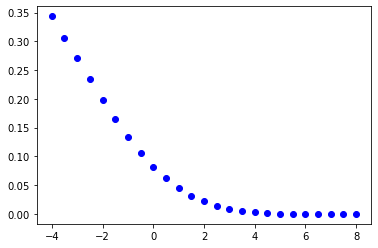

In [76]:
import matplotlib.pyplot as plt
plt.plot(EbNodB_range, ber, 'bo',label='Autoencoder(7,4)')
plt.plot(list(EbNodB_range), ber_theory, 'ro-',label='BPSK BER')
plt.yscale('log')
plt.xlabel('SNR Range')
plt.ylabel('Block Error Rate')
plt.grid()
plt.legend(loc='upper right',ncol = 1)

In [77]:
plt.savefig('AutoEncoder_7_4_BER_matplotlib')
plt.show()

<Figure size 432x288 with 0 Axes>